In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [70]:
data1 = pd.read_csv('train.csv',encoding='Latin2')
data1.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [72]:
data2 = pd.read_csv('test.csv',encoding='Latin2')
data2.head()

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...


In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299989 entries, 0 to 299988
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ItemID         299989 non-null  int64 
 1   SentimentText  299989 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [74]:
data1.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [75]:
data1.duplicated().sum()

0

## Preprocessing the dataset

In [111]:
df=data1.copy()

In [112]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [113]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [114]:
df.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


Precntage for sentiment

Sentiment
1    56.46
0    43.54
Name: proportion, dtype: float64


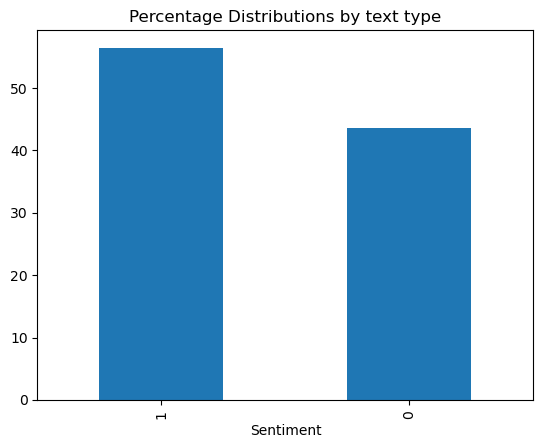

In [115]:
## Checking for the Distribution
print("Precntage for sentiment\n")
print(round(df.Sentiment.value_counts(normalize=True)*100,2))
round(df.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage Distributions by text type")
plt.show()

In [116]:
# remove twitter handles (@user)
df['clean'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")

In [117]:
df.tail()

,ItemID,Sentiment,SentimentText,clean
99984,99996,0,@Cupcake seems like a repeating problem hop...,seems like a repeating problem hope you're...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,arrrr we both replied to each other over diff...
99986,99998,0,@CuPcAkE_2120 ya i thought so,ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,Yes. Yes. I'm glad you had more fun with me.
99988,100000,1,@cupcake_kayla haha yes you do,haha yes you do


In [118]:
# remove special characters, numbers and punctuations
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [119]:
# update text 
df['clean_text'] = pd.DataFrame(df.clean.apply(cleaned))
df.head()

,ItemID,Sentiment,SentimentText,clean,clean_text
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl friend
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trailer
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O,omg its already o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive be...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me tt


In [120]:
df.tail()

,ItemID,Sentiment,SentimentText,clean,clean_text
99984,99996,0,@Cupcake seems like a repeating problem hop...,seems like a repeating problem hope you're...,seems like a repeating problem hope youre ...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,arrrr we both replied to each other over diff...,arrrr we both replied to each other over diff...
99986,99998,0,@CuPcAkE_2120 ya i thought so,ya i thought so,ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,Yes. Yes. I'm glad you had more fun with me.,yes yes im glad you had more fun with me
99988,100000,1,@cupcake_kayla haha yes you do,haha yes you do,haha yes you do


In [122]:
# remove short words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [123]:
df.tail()

,ItemID,Sentiment,SentimentText,clean,clean_text
99984,99996,0,@Cupcake seems like a repeating problem hop...,seems like a repeating problem hope you're...,seems like repeating problem hope youre able f...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,arrrr we both replied to each other over diff...,arrrr both replied each other over different t...
99986,99998,0,@CuPcAkE_2120 ya i thought so,ya i thought so,thought
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,Yes. Yes. I'm glad you had more fun with me.,yes yes glad you had more fun with
99988,100000,1,@cupcake_kayla haha yes you do,haha yes you do,haha yes you


## Exploratory Data Analysis

In [126]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 4.6 MB/s eta 0:00:00


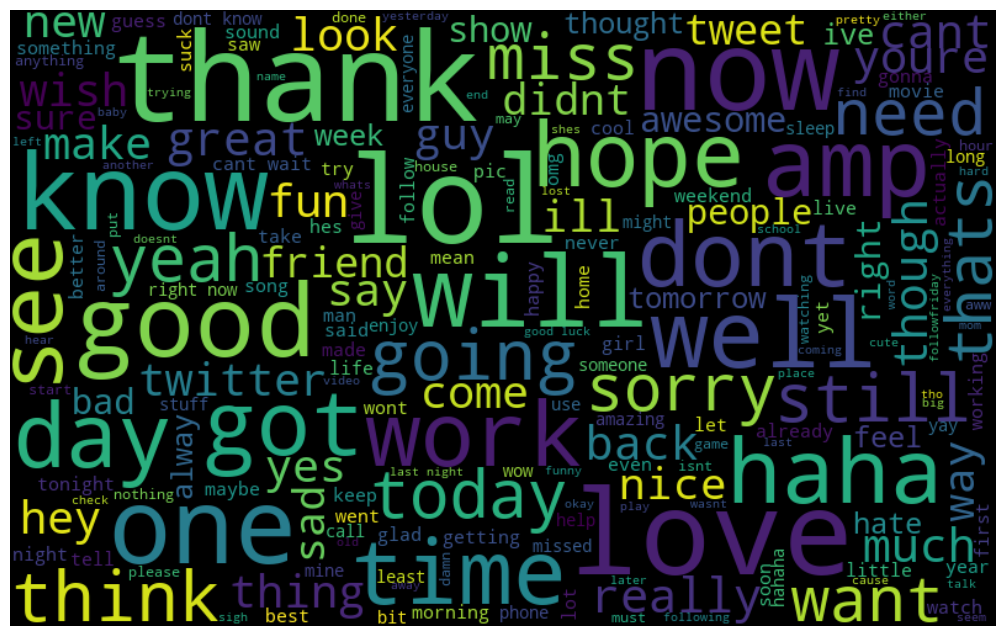

In [127]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

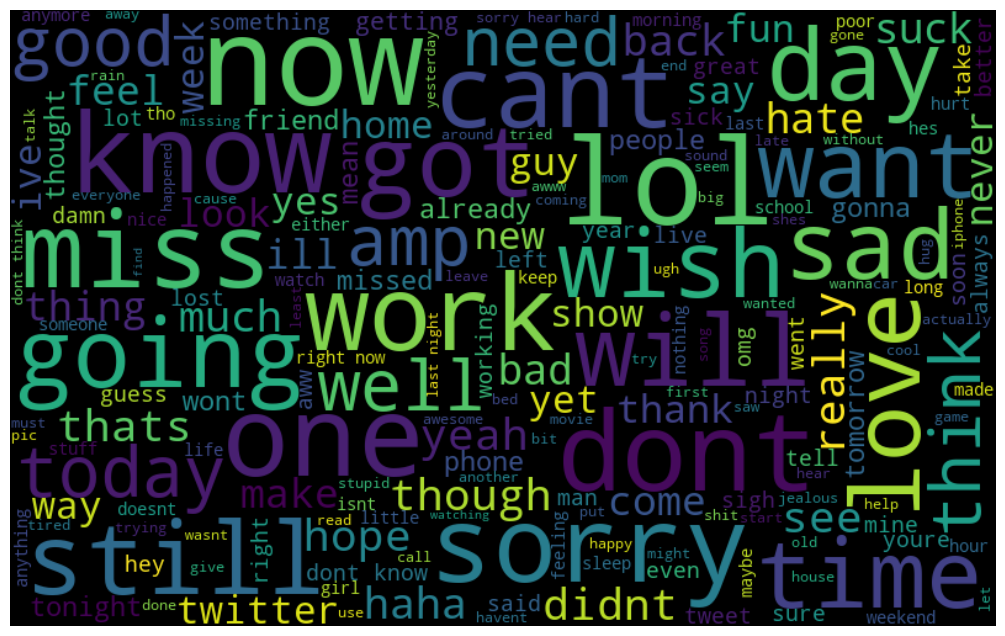

In [130]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

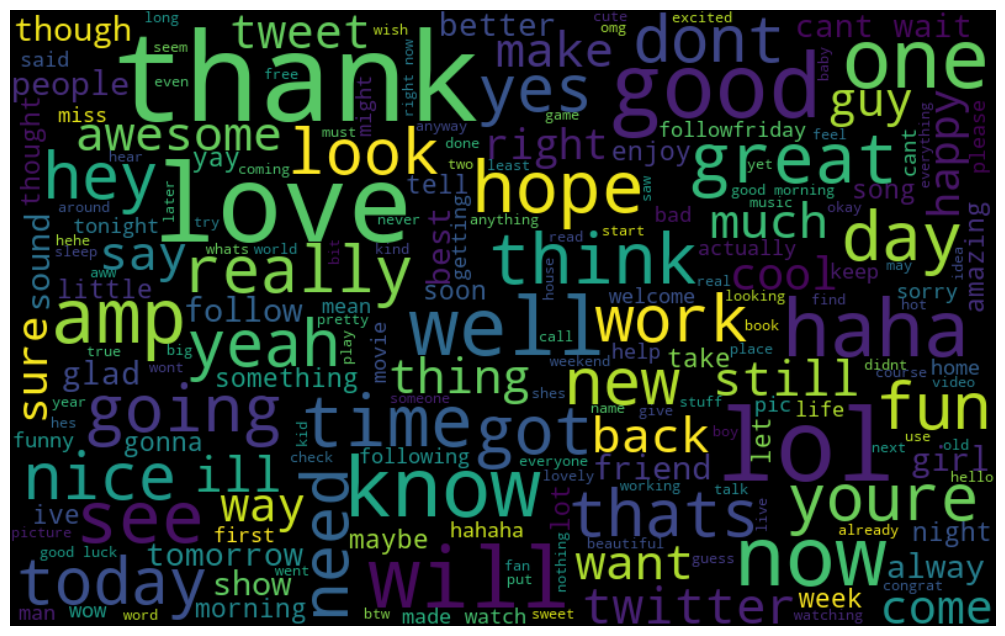

In [131]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Input Split

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], random_state=42, test_size=0.25)

## Model Training

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [154]:
tvec =TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs')

In [155]:
from sklearn.pipeline import Pipeline

In [156]:
model = Pipeline([('Vectorizer',tvec),('classifier',clf)])

model.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [158]:
pred = model.predict(x_test)

confusion_matrix(pred,y_test)

array([[ 7464,  2396],
       [ 3498, 11640]], dtype=int64)

In [159]:
f1_score(pred,y_test)

0.7979707959141702

In [160]:
accuracy_score(pred,y_test)

0.7642211376910153

In [161]:
recall_score(pred,y_test)

0.7689258818866429

In [162]:
precision_score(pred,y_test)

0.829296095753776

## Trying on new reviews

In [168]:
example =["thank"]
result = model.predict(example)

print(result)

[1]


# VADER MODEL

In [270]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [271]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299989 entries, 0 to 299988
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ItemID         299989 non-null  int64 
 1   SentimentText  299989 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [272]:
data = pd.concat([data1, data2], ignore_index=True, sort=False)
data.head()

,ItemID,Sentiment,SentimentText
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...


In [273]:
## remove unwanted columns
data.drop('Sentiment', axis=1, inplace=True) 

In [274]:
data.head()

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...


In [275]:
# remove twitter handles (@user)
data['clean'] = np.vectorize(remove_pattern)(data['SentimentText'], "@[\w]*")

In [276]:
data.head()

,ItemID,SentimentText,clean
0,1,is so sad for my APL frie...,is so sad for my APL frie...
1,2,I missed the New Moon trail...,I missed the New Moon trail...
2,3,omg its already 7:30 :O,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


In [277]:
# remove special characters, numbers and punctuations
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [278]:
# update text 
data['clean_text'] = pd.DataFrame(data.clean.apply(cleaned))
data.head()

,ItemID,SentimentText,clean,clean_text
0,1,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl friend
1,2,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trailer
2,3,omg its already 7:30 :O,omg its already 7:30 :O,omg its already o
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive be...
4,5,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me tt


In [279]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [280]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [281]:
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop]))


In [282]:
data.head()

,ItemID,SentimentText,clean,clean_text
0,1,is so sad for my APL frie...,is so sad for my APL frie...,sad apl friend
1,2,I missed the New Moon trail...,I missed the New Moon trail...,missed new moon trailer
2,3,omg its already 7:30 :O,omg its already 7:30 :O,omg already
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive dentist since ...
4,5,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,think mi bf cheating tt


In [283]:
# remove short words
data['clean_text'] = data['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [284]:
data.head()

,ItemID,SentimentText,clean,clean_text
0,1,is so sad for my APL frie...,is so sad for my APL frie...,sad apl friend
1,2,I missed the New Moon trail...,I missed the New Moon trail...,missed new moon trailer
2,3,omg its already 7:30 :O,omg its already 7:30 :O,omg already
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since supose...
4,5,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,think cheating


In [285]:
data.tail()

,ItemID,SentimentText,clean,clean_text
399973,299996,"@martine2323 'Morning, Petal - work brought me...","'Morning, Petal - work brought me here (banki...",morning petal work brought banking first holla...
399974,299997,"@martinetrene Hello,little bird! i finally st...","Hello,little bird! i finally started on Rick...",hellolittle bird finally started ricks movie m...
399975,299998,@MartinezMayra I got u at work when I go buy o...,I got u at work when I go buy one u know ima ...,got work buy one know ima get one
399976,299999,@martinfaux He certainly gives good interview,He certainly gives good interview,certainly gives good interview
399977,300000,@martinfaux we've the feedback about our brows...,we've the feedback about our browser compatib...,weve feedback browser compatibility story loud...


## VADER Sentiment Scoring

In [286]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [287]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [288]:
sia = SentimentIntensityAnalyzer()

In [289]:
sia

In [290]:
sia.polarity_scores("I am worthy!")

{'neg': 0.0, 'neu': 0.239, 'pos': 0.761, 'compound': 0.4926}

In [291]:
# run the polarity score on dataset
res = {}
for i, row in tqdm(data.iterrows(),total=len(data)):
    text = row['clean_text']
    myid = row['ItemID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/399978 [00:00<?, ?it/s]

In [297]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ItemID'})
vaders = vaders.merge(data,how='left')

In [300]:
vaders.drop_duplicates(inplace=True)

In [305]:
vaders.head()

,ItemID,neg,neu,pos,compound,SentimentText,clean,clean_text
0,1,0.425,0.137,0.438,0.0258,is so sad for my APL frie...,is so sad for my APL frie...,sad apl friend
2,2,0.423,0.577,0.000,-0.2960,I missed the New Moon trail...,I missed the New Moon trail...,missed new moon trailer
4,3,0.000,1.000,0.000,0.0000,omg its already 7:30 :O,omg its already 7:30 :O,omg already
6,4,0.237,0.763,0.000,-0.4767,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry ive dentist since supose...
8,5,0.783,0.217,0.000,-0.5574,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,think cheating
